## Jacobian of Coordinate Transformation from Cartesian to Spherical

In [1]:
Needs["xAct`xCoba`", FileNameJoin[{Environment["GENERATO"], "src/Generato.wl"}]]

------------------------------------------------------------
Package xAct`xPerm`  version 1.2.3, {2015, 8, 23}
CopyRight (C) 2003-2020, Jose M. Martin-Garcia, under the General Public\
 
>   License.
Connecting to external mac executable...
Connection established.
------------------------------------------------------------
Package xAct`xTensor`  version 1.2.0, {2021, 10, 17}
CopyRight (C) 2002-2021, Jose M. Martin-Garcia, under the General Public\
 
>   License.
------------------------------------------------------------
These packages come with ABSOLUTELY NO WARRANTY; for details type\
 
>   Disclaimer[]. This is free software, and you are welcome to redistribute\
 
>   it under certain conditions. See the General Public License for details.
------------------------------------------------------------
------------------------------------------------------------
Package xAct`xCoba`  version 0.8.6, {2021, 2, 28}
CopyRight (C) 2005-2021, David Yllanes and Jose M. Martin-Garcia, under t

## Set Up

In [2]:
DefManifold[R3, 3, {a, b, c, d, e, f, i, j, k}];

In [3]:
DefChart[sph, R3, {1, 2, 3}, {r[], \[Theta][], \[Phi][]}, ChartColor -> Red];
DefChart[cart, R3, {1, 2, 3}, {x[], y[], z[]}, ChartColor -> Green];

In [5]:
$Assumptions = And[
  (x[] | y[] | z[] | r[] | \[Theta][] | \[Phi][]) \[Element] Reals,
  r[] > 0,
  0 < \[Theta][] < Pi,
  0 <= \[Phi][] < 2 Pi
];

In [6]:
SphInCart = {
  Sqrt[x[]^2 + y[]^2 + z[]^2],
  ArcCos[z[]/Sqrt[x[]^2 + y[]^2 + z[]^2]],
  ArcTan[x[], y[]]
};
CartInSph = r[] {
  Sin[\[Theta][]] Cos[\[Phi][]],
  Sin[\[Theta][]] Sin[\[Phi][]],
  Cos[\[Theta][]]
};

{Cos[ϕ[]] r[] Sin[θ[]],                                 }

 r[] Sin[θ[]] Sin[ϕ[]]          2      2      2
                        Sqrt[x[]  + y[]  + z[] ]
 Cos[θ[]] r[]
                                         z[]
                        ArcCos[------------------------]
                                       2      2      2
                               Sqrt[x[]  + y[]  + z[] ]




                        ArcTan[x[], y[]]
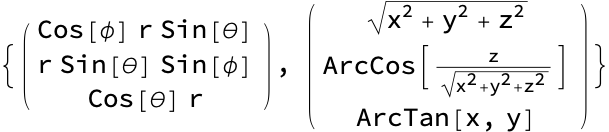

In [8]:
{CartInSph // MatrixForm, SphInCart // MatrixForm}

In [9]:
Cart2SphRules = Thread[{x[], y[], z[]} -> CartInSph];
Sph2CartRules = Thread[{r[], \[Theta][], \[Phi][]} -> SphInCart];

{x[] -> Cos[ϕ[]] r[] Sin[θ[]],                                        }

 y[] -> r[] Sin[θ[]] Sin[ϕ[]]                 2      2      2
                               r[] -> Sqrt[x[]  + y[]  + z[] ]
 z[] -> Cos[θ[]] r[]
                                                       z[]
                               θ[] -> ArcCos[------------------------]
                                                     2      2      2
                                             Sqrt[x[]  + y[]  + z[] ]




                               ϕ[] -> ArcTan[x[], y[]]
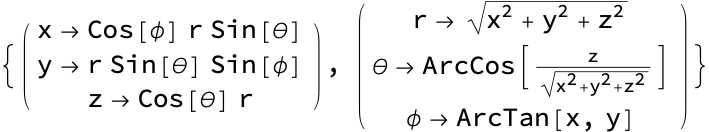

In [11]:
{Cart2SphRules // MatrixForm, Sph2CartRules // MatrixForm}

{x[] -> x[], y[] -> y[], z[] -> z[]}
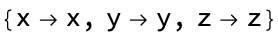

In [12]:
Cart2SphRules /. Sph2CartRules // Simplify

{r[] -> r[], θ[] -> θ[], ϕ[] -> ArcTan[Cos[ϕ[]], Sin[ϕ[]]]}
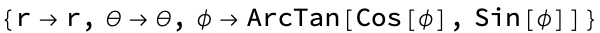

In [13]:
Sph2CartRules /. Cart2SphRules // FullSimplify

In [14]:
JacCart2SphMat = Simplify@Outer[D, SphInCart, {x[], y[], z[]}];
JacSph2CartMat = Simplify@Outer[D, CartInSph, {r[], \[Theta][], \[Phi][]}];

### Matrix $\frac{\partial r^i}{\partial x^j}$ and $\frac{\partial x^i}{\partial r^j}$

In [16]:
JacSphInCartMat = Simplify@Outer[D, SphInCart, {x[], y[], z[]}];
JacCartInSphMat = Simplify@Outer[D, CartInSph, {r[], \[Theta][], \[Phi][]}];

x[]                                      y[]
------------------------                 ------------------------
        2      2      2                          2      2      2
Sqrt[x[]  + y[]  + z[] ]                 Sqrt[x[]  + y[]  + z[] ]
 

               z[]
     ------------------------
             2      2      2
>    Sqrt[x[]  + y[]  + z[] ]


               x[] z[]                                  y[] z[]
--------------------------------------   --------------------------------------
        2      2      2      2      2            2      2      2      2      2
Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )   Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )
 
               2      2
       Sqrt[x[]  + y[] ]
     -(------------------)
          2      2      2
>      x[]  + y[]  + z[]


      y[]                                    x[]
-(-----------)                           -----------
     2      2                               2      2
  x[]  + y[]                             x[]  + y[]
 




>    0
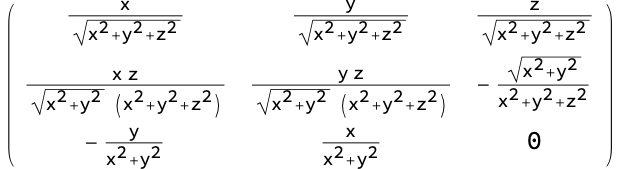

In [18]:
JacSphInCartMat // MatrixForm

Cos[ϕ[]] Sin[θ[]]          Cos[θ[]] Cos[ϕ[]] r[]      -(r[] Sin[θ[]] Sin[ϕ[]])

Sin[θ[]] Sin[ϕ[]]          Cos[θ[]] r[] Sin[ϕ[]]      Cos[ϕ[]] r[] Sin[θ[]]

Cos[θ[]]                   -(r[] Sin[θ[]])            0
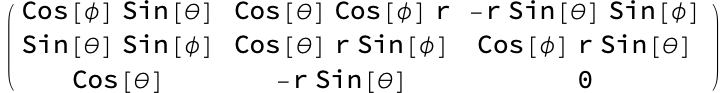

In [19]:
JacCartInSphMat // MatrixForm

### Define Tensors using Components

In [20]:
JacCinS = CTensor[JacCartInSphMat, {cart, -sph}];
JacSinC = CTensor[JacSphInCartMat, {sph, -cart}];

-Image-
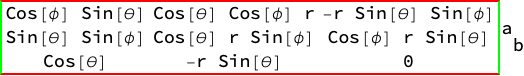

In [22]:
JacCinS[a, -b] // Rasterize

-Image-
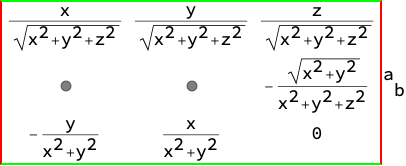

In [23]:
JacSinC[a, -b] // Rasterize

-Image-
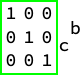

In [24]:
(JacCinS[b, -a] JacSinC[a, -c] /. Cart2SphRules) // Simplify // Rasterize

-Image-
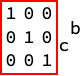

In [25]:
(JacSinC[b, -a] JacCinS[a, -c] /. Cart2SphRules) // Simplify // Rasterize

### Set Coordinate Transformation

Use SetBasisChange with two arguments. The last argument selects the default coordinate chart. We now also compute derivatives, with respect to the coordinates of that given chart:

In [26]:
SetBasisChange[JacSinC, cart]

In [27]:
(*PrintxCobaCache[]*)

## Jacobian $\frac{\partial r^i}{\partial x^j}$

x[]                   x[] z[]
------------------------   -----------------
        2      2      2            2      2
Sqrt[x[]  + y[]  + z[] ]   Sqrt[x[]  + y[] ]          -y[]

          y[]                   y[] z[]
------------------------   -----------------
        2      2      2            2      2
Sqrt[x[]  + y[]  + z[] ]   Sqrt[x[]  + y[] ]          x[]

          z[]
------------------------
        2      2      2             2      2
Sqrt[x[]  + y[]  + z[] ]   -Sqrt[x[]  + y[] ]         0
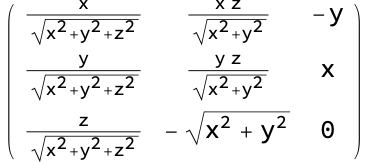

In [28]:
Table[JacSinC[{ii, cart}, {jj, -sph}], {ii, 1, 3}, {jj, 1, 3}] // MatrixForm

## Derivative of Jacobian $\frac{\partial^2r^i}{\partial x^j \partial x^k}$

2      2
      y[]  + z[]
-----------------------
    2      2      2 3/2
(x[]  + y[]  + z[] )
 

               x[] y[]
     -(-----------------------)
           2      2      2 3/2
>      (x[]  + y[]  + z[] )
 

               x[] z[]
     -(-----------------------)
           2      2      2 3/2
>      (x[]  + y[]  + z[] )

           4      2    2      4      2    2
z[] (-2 x[]  - x[]  y[]  + y[]  + y[]  z[] )
--------------------------------------------
       2      2 3/2     2      2      2 2
   (x[]  + y[] )    (x[]  + y[]  + z[] )
 
                          2        2      2
        x[] y[] z[] (3 x[]  + 3 y[]  + z[] )
     -(--------------------------------------)
           2      2 3/2     2      2      2 2
>      (x[]  + y[] )    (x[]  + y[]  + z[] )
 
                    2      2      2
            x[] (x[]  + y[]  - z[] )
     ---------------------------------------
             2      2      2      2      2 2
>    Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )


  2 x[] y[]
--------------
    2      2 2
(x[]  + y[] )
 
          2      2
      -x[]  + y[]
     --------------
         2      2 2
>    (x[]  + y[] )
 




>    0

                                                     2      2
          x[] y[]                                 x[]  + z[]
-(-----------------------)                  -----------------------
      2      2      2 3/2                       2      2      2 3/2
  (x[]  + y[]  + z[] )                      (x[]  + y[]  + z[] )
 

                  y[] z[]
        -(-----------------------)
              2      2      2 3/2
>         (x[]  + y[]  + z[] )

                     2        2      2              4        4      2      2      2
   x[] y[] z[] (3 x[]  + 3 y[]  + z[] )     z[] (x[]  - 2 y[]  + x[]  (-y[]  + z[] ))
-(--------------------------------------)   -----------------------------------------
      2      2 3/2     2      2      2 2         2      2 3/2     2      2      2 2
  (x[]  + y[] )    (x[]  + y[]  + z[] )      (x[]  + y[] )    (x[]  + y[]  + z[] )
 
                       2      2      2
               y[] (x[]  + y[]  - z[] )
        ---------------------------------------
                2      2      2      2      2 2
>       Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )

     2      2
 -x[]  + y[]                                  -2 x[] y[]
--------------                              --------------
    2      2 2                                  2      2 2
(x[]  + y[] )                               (x[]  + y[] )
 




>       0


          x[] z[]                                   y[] z[]
-(-----------------------)                -(-----------------------)
      2      2      2 3/2                       2      2      2 3/2
  (x[]  + y[]  + z[] )                      (x[]  + y[]  + z[] )
 
              2      2
           x[]  + y[]
     -----------------------
         2      2      2 3/2
>    (x[]  + y[]  + z[] )

               2      2      2                           2      2      2
       x[] (x[]  + y[]  - z[] )                  y[] (x[]  + y[]  - z[] )
---------------------------------------   ---------------------------------------
        2      2      2      2      2 2           2      2      2      2      2 2
Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )    Sqrt[x[]  + y[] ] (x[]  + y[]  + z[] )
 
               2      2
     2 Sqrt[x[]  + y[] ] z[]
     -----------------------
          2      2      2 2
>     (x[]  + y[]  + z[] )





0                                         0
 




>    0
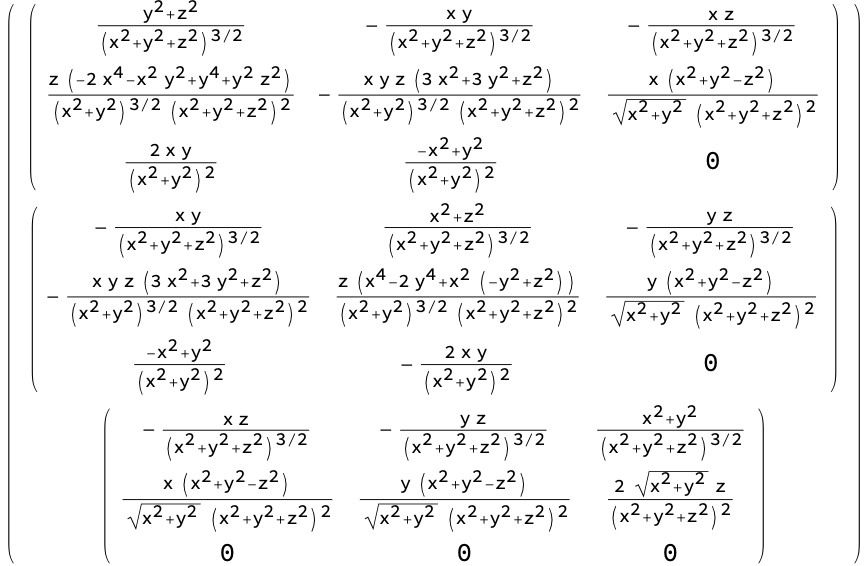

In [29]:
Table[
    Table[PDcart[{kk, -cart}][JacSinC[{ii, sph}, {jj, -cart}]], {ii, 1, 3}, {jj, 1, 3}] // Simplify // MatrixForm,
{kk, 1, 3}] // MatrixForm